In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Generated Data

In [2]:
def trend(time, slope, baseline):
    return slope * time + baseline

def seasonal_pattern(season_time):
    return np.where(season_time<0.4,
                    np.cos(season_time*2*np.pi),
                    1 / np.exp(3*season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [23]:
# config
baseline = 50
amplitude = 20
slope = 0.09
noise_level = 10
seed = 42
time = np.arange((5 * 365 )+ 1, dtype = 'float32')
# data
trend_data = trend(time,slope,baseline)
season_data = seasonality(time, period=365, amplitude=amplitude)
noise_data = noise(time, noise_level=noise_level, seed=seed)
clean_data = trend_data+season_data
data = trend_data+season_data+noise_data
# df
ls_data = list(zip(trend_data,season_data,noise_data,clean_data,data))
df_data = pd.DataFrame(ls_data, columns=['trend_data','season_data','noise_data','actual','y'])
df_fulldata = df_data.copy()
df_fulldata['y1'] = df_data['y'].shift(-1)
df_fulldata['y2'] = df_data['y'].shift(-2)

df_fulldata['actual_y1'] = df_data['actual'].shift(-1)
df_fulldata['actual_y2'] = df_data['actual'].shift(-2)

# Lag
for i in list(range(15))+[30, 60, 180, 365]:
    df_fulldata[f'lag_{i}'] = df_data['y'].transform(lambda x: x.shift(i))
# Diff
for i in list(range(1,15))+[30, 60, 180, 365]:
    df_fulldata[f'diff_{i}'] = df_data['y'].transform(lambda x: x.diff(i))
    df_fulldata[f'diff_ma_{i}'] = df_fulldata[f'diff_{i}'] * 0.05
# MA
for i in list(range(2,15,2))+[30, 60, 180, 365]:
    df_fulldata[f'ma_{i}'] = df_data['y'].transform(lambda x: x.rolling(i).mean())
# Sum
for i in [7, 14, 30, 60, 180, 365]:
    df_fulldata[f'sum_{i}'] = df_data['y'].transform(lambda x: x.rolling(i).sum())
# Std
for i in [7, 14, 30, 60, 180, 365]:
    df_fulldata[f'std_{i}'] = df_data['y'].transform(lambda x: x.rolling(i).std())
# Max
for i in [7, 14, 30, 60, 180, 365]:
    df_fulldata[f'max_{i}'] = df_data['y'].transform(lambda x: x.rolling(i).max())

df_fulldata = df_fulldata.dropna(axis=0).reset_index(drop=True)
df_fulldata.shape

(1459, 93)

In [29]:
df_fulldata

,trend_data,season_data,noise_data,actual,y,y1,y2,actual_y1,actual_y2,lag_0,...,std_30,std_60,std_180,std_365,max_7,max_14,max_30,max_60,max_180,max_365
0,82.850006,20.000000,-4.012205,102.850006,98.837801,105.177967,103.144067,102.937042,103.018143,98.837801,...,8.135501,7.920571,10.366254,13.556121,98.846417,98.846417,98.846417,101.400138,110.926492,110.926492
1,82.940002,19.997036,2.240925,102.937042,105.177967,103.144067,104.070099,103.018143,103.093338,105.177967,...,8.952259,8.357636,10.567208,13.679319,105.177967,105.177967,105.177967,105.177967,110.926492,110.926492
2,83.029999,19.988148,0.125924,103.018143,103.144067,104.070099,95.432515,103.093338,103.162613,103.144067,...,9.591377,8.664327,10.720613,13.783286,105.177967,105.177967,105.177967,105.177967,110.926492,110.926492
3,83.120003,19.973337,0.976761,103.093338,104.070099,95.432515,103.471069,103.162613,103.225967,104.070099,...,10.251618,9.068045,10.835107,13.873527,105.177967,105.177967,105.177967,105.177967,110.926492,110.926492
4,83.210007,19.952606,-7.730098,103.162613,95.432515,103.471069,108.263400,103.225967,103.283417,95.432515,...,10.290841,9.155788,10.783989,13.934799,105.177967,105.177967,105.177967,105.177967,110.926492,110.926492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,213.710007,1.046077,-9.871795,214.756088,204.884293,213.524955,215.687540,214.837524,214.919022,204.884293,...,10.231134,9.844469,9.660324,14.109798,223.237360,230.310240,232.234792,232.266571,232.266571,232.875442
1455,213.800003,1.037515,-1.312570,214.837524,213.524955,215.687540,212.752051,214.919022,215.000610,213.524955,...,9.718567,9.626328,9.655925,13.990042,213.524955,230.310240,232.234792,232.266571,232.266571,232.875442
1456,213.889999,1.029022,0.768519,214.919022,215.687540,212.752051,208.582219,215.000610,215.082245,215.687540,...,9.741863,9.604755,9.653197,13.995815,215.687540,230.310240,232.234792,232.266571,232.266571,232.875442
1457,213.980011,1.020599,-2.248560,215.000610,212.752051,208.582219,216.850502,215.082245,215.163956,212.752051,...,9.744177,9.609840,9.642772,13.984068,215.687540,230.310240,232.234792,232.266571,232.266571,232.875442


# Plot

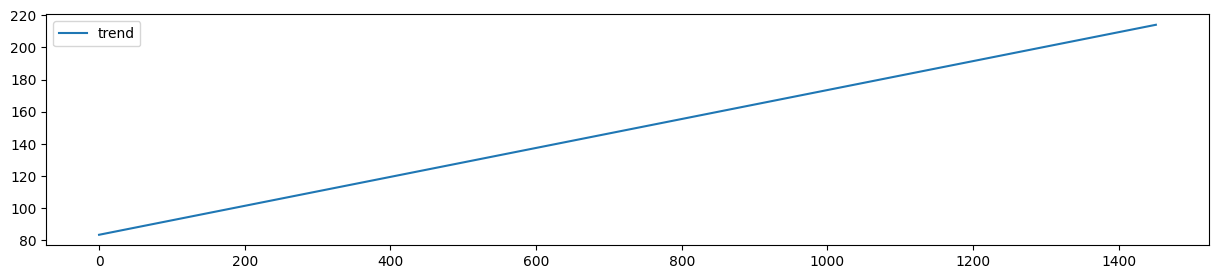

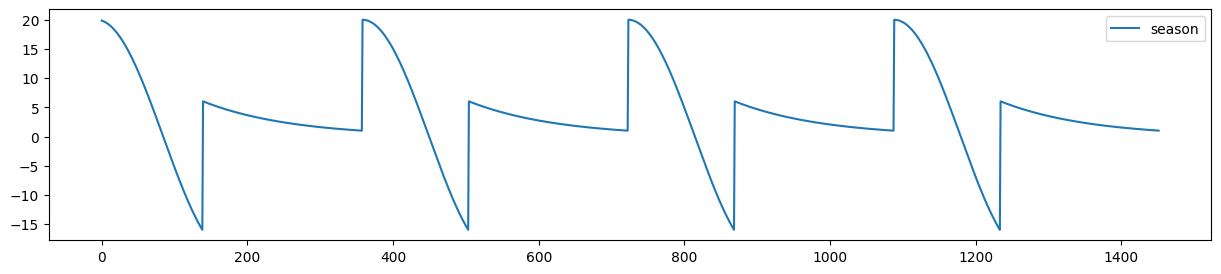

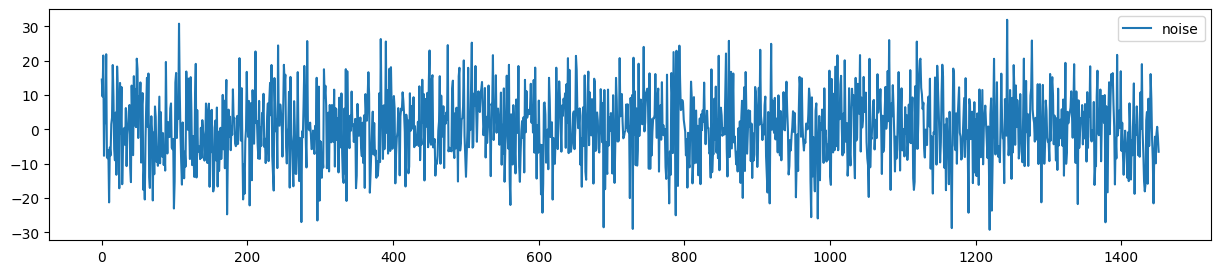

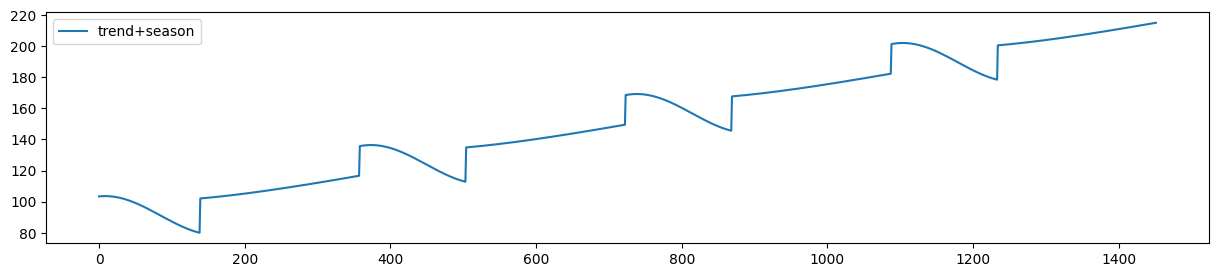

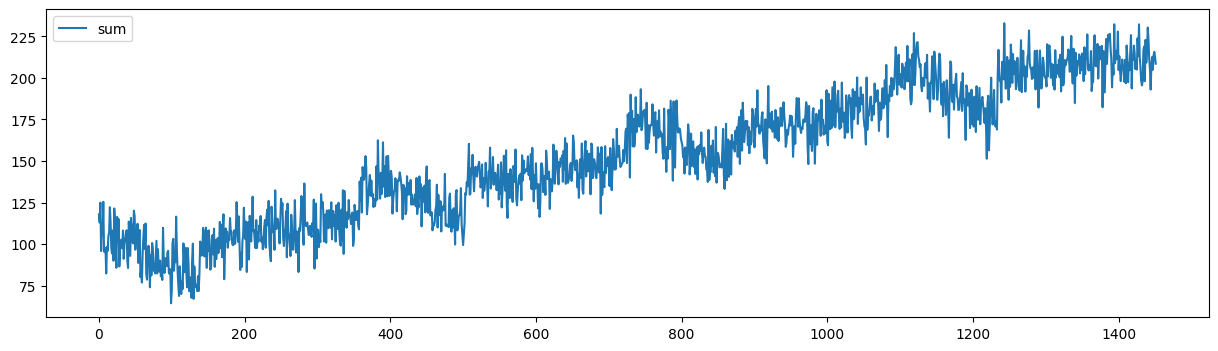

In [78]:
plt.figure(figsize=(15,3))
plt.plot(df_fulldata['trend_data'], label ='trend')
plt.legend()
plt.show()
plt.figure(figsize=(15,3))
plt.plot(df_fulldata['season_data'], label ='season')
plt.legend()
plt.show()
plt.figure(figsize=(15,3))
plt.plot(df_fulldata['noise_data'], label = 'noise')
plt.legend()
plt.show()
plt.figure(figsize=(15,3))
plt.plot(df_fulldata['actual'], label ='trend+season')
plt.legend()
plt.show()
plt.figure(figsize=(15,4))
plt.plot(df_fulldata['y'], label='sum')
plt.legend()
plt.show()

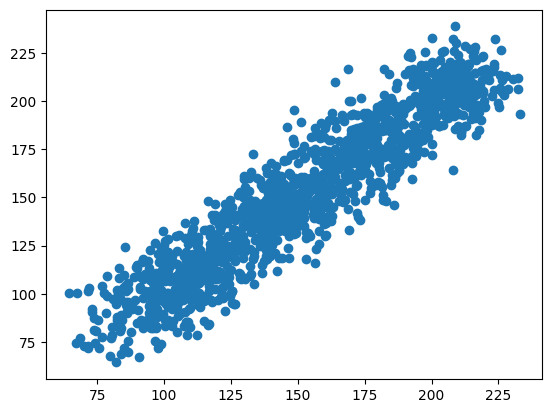

In [79]:
# Correlation
plt.scatter(df_fulldata['lag_0'],df_fulldata['y2'], label ='trend')

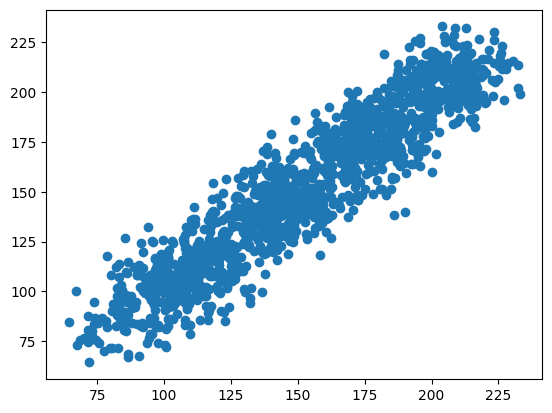

In [80]:
# Colinearity
plt.scatter(df_fulldata['lag_0'],df_fulldata['lag_1'], label ='trend')

# Moving average

In [5]:
def MAE(y_true,y_pred):
    return round(mean_absolute_error(y_true,y_pred),2)

# Y1

In [34]:
print(f"MAE Actual y1 : {MAE(df_fulldata['y1'], df_fulldata['actual_y1'])}")
print("MAE Moving Average")
for i in list(range(2,15,2))+[30, 60, 180, 365]:
    err_noise = MAE(df_fulldata['y1'], df_fulldata[f'ma_{i}'])
    err_no_noise = MAE(df_fulldata['actual_y1'], df_fulldata[f'ma_{i}'])
    print(f"ma_{i:<3} : {err_no_noise:>5.2f}   {err_noise:>5.2f}")
# Adding Noise to MA
print("MAE Moving Average + Noise")
for i in list(range(2,15,2))+[30, 60, 180, 365]:
    result = df_fulldata[f'ma_{i}'] + df_fulldata[f'diff_ma_{i}']
    err_noise = MAE(df_fulldata['y1'], result)
    err_no_noise = MAE(df_fulldata['actual_y1'], result)
    print(f"ma_{i:<3} : {err_no_noise:>5.2f}   {err_noise:>5.2f}")

MAE Actual y1 : 7.98
MAE Moving Average
ma_2   :  5.80    9.83
ma_4   :  4.30    9.07
ma_6   :  3.68    8.85
ma_8   :  3.32    8.79
ma_10  :  3.09    8.71
ma_12  :  2.99    8.68
ma_14  :  2.95    8.69
ma_30  :  3.56    9.02
ma_60  :  5.55   10.19
ma_180 :  9.71   12.49
ma_365 : 16.07   17.66
MAE Moving Average + Noise
ma_2   :  6.08   10.03
ma_4   :  4.50    9.17
ma_6   :  3.84    8.93
ma_8   :  3.47    8.84
ma_10  :  3.20    8.72
ma_12  :  3.08    8.70
ma_14  :  3.02    8.70
ma_30  :  3.42    8.92
ma_60  :  5.15    9.91
ma_180 :  8.98   11.98
ma_365 : 14.60   16.37


# Y2

In [33]:
print(f"MAE Actual y2 : {MAE(df_fulldata['y2'], df_fulldata['actual_y2'])}")
print("MAE Moving Average")
for i in list(range(2,15,2))+[30, 60, 180, 365]:
    err_noise = MAE(df_fulldata['y2'], df_fulldata[f'ma_{i}'])
    err_no_noise = MAE(df_fulldata['actual_y2'], df_fulldata[f'ma_{i}'])
    print(f"ma_{i:<3} : {err_no_noise:>5.2f}   {err_noise:>5.2f}")
# Adding Noise to MA
print("MAE Moving Average + Noise")
for i in list(range(2,15,2))+[30, 60, 180, 365]:
    result = df_fulldata[f'ma_{i}'] + df_fulldata[f'diff_ma_{i}']
    err_noise = MAE(df_fulldata['y2'], result)
    err_no_noise = MAE(df_fulldata['actual_y2'], result)
    print(f"ma_{i:<3} : {err_no_noise:>5.2f}   {err_noise:>5.2f}")

MAE Actual y2 : 7.98
MAE Moving Average
ma_2   :  5.89    9.75
ma_4   :  4.41    9.08
ma_6   :  3.78    8.95
ma_8   :  3.42    8.85
ma_10  :  3.21    8.78
ma_12  :  3.10    8.74
ma_14  :  3.08    8.77
ma_30  :  3.72    9.11
ma_60  :  5.71   10.30
ma_180 :  9.80   12.55
ma_365 : 16.16   17.73
MAE Moving Average + Noise
ma_2   :  6.17    9.91
ma_4   :  4.60    9.18
ma_6   :  3.94    9.00
ma_8   :  3.57    8.91
ma_10  :  3.31    8.82
ma_12  :  3.20    8.76
ma_14  :  3.14    8.79
ma_30  :  3.58    9.02
ma_60  :  5.31   10.04
ma_180 :  9.06   12.06
ma_365 : 14.68   16.45


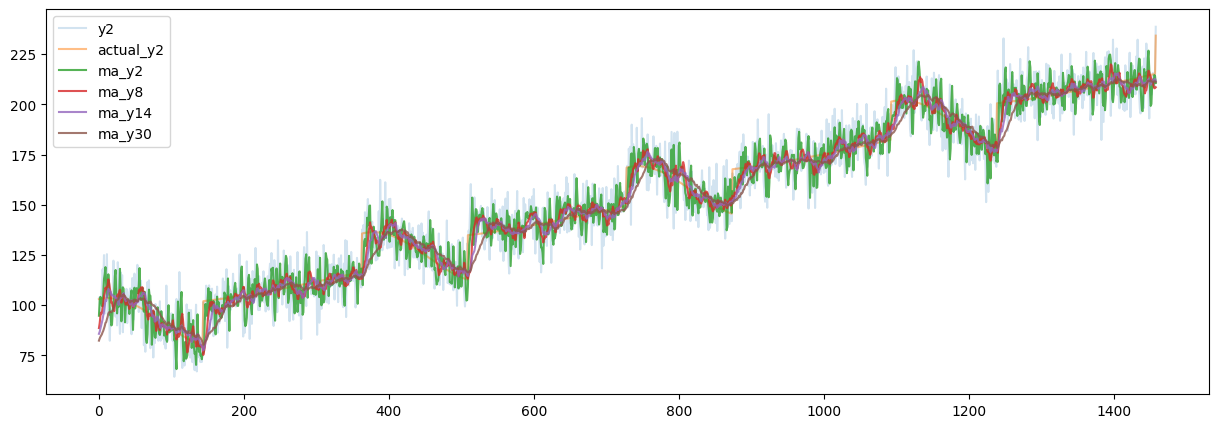

In [28]:
plt.figure(figsize=(15,5))
plt.plot(df_fulldata['y2'], label ='y2', alpha=0.2)
plt.plot(df_fulldata['actual_y2'], label ='actual_y2', alpha=0.5)
for i in [2,8,14,30]:
    plt.plot(df_fulldata[f'ma_{i}'], label =f'ma_y{i}', alpha=0.8)
plt.legend()
plt.show()

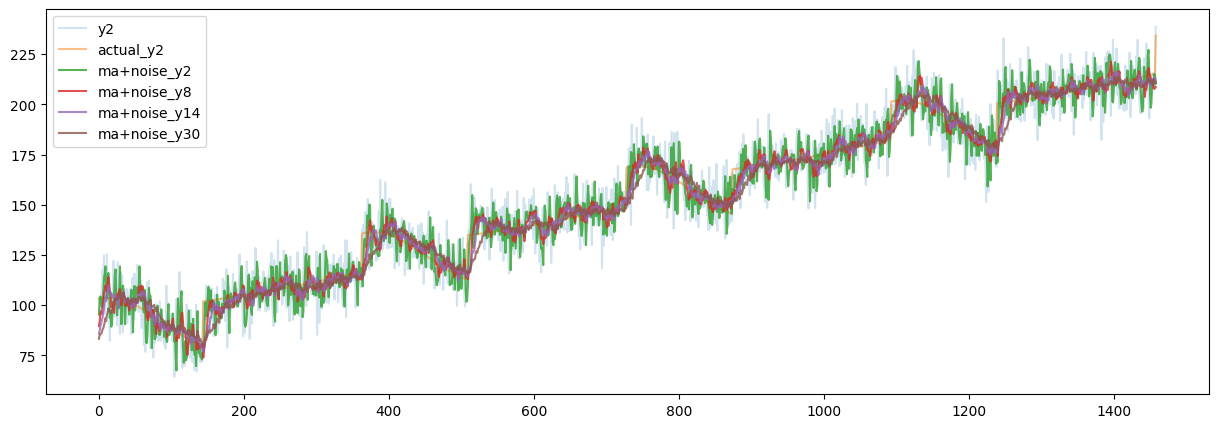

In [27]:
plt.figure(figsize=(15,5))
plt.plot(df_fulldata['y2'], label ='y2', alpha=0.2)
plt.plot(df_fulldata['actual_y2'], label ='actual_y2', alpha=0.5)
for i in [2,8,14,30]:
    result = df_fulldata[f'ma_{i}']+ df_fulldata[f'diff_ma_{i}']
    plt.plot(result, label =f'ma+noise_y{i}', alpha=0.8)
plt.legend()
plt.show()

# Check Data Insight
> Reference : https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/